In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle EEG Time Series Data
#
##########################################################################################

In [1]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_TS_EEG_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub pull request
#
##################################################################################################################


## Get Data 


Data Description: https://archive.ics.uci.edu/ml/datasets/EEG+Database

Data Set:         https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/


In [174]:
##################################################################################################################
#
# YouDo:
#
#  From the above link, download the file: SMNI_CMI_TRAIN.tar.gz
#  Unzip it and extract the files to a useful location and set
#  the variables filesloc to point to it like:
#  filesloc = '../BIOS6644/Data/SMNI_CMI_TRAIN/'

filesloc = '../BIOS6644/Data/SMNI_CMI_TRAIN/'

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook

# Some useful extras
import os
import gzip
import datetime as dt



## File roundup

The following snippet of code uses the os.walk command to find all files in your filesloc folder.   It then calls the unzip function to unzip anything that needs unzipping

In [281]:
# Adapted from https://www.tutorialspoint.com/python/os_walk.htm
# & http://xahlee.info/python/gzip.html

def unzip(filename):
    import gzip
    print('Unzipping {}'.format(filename))
    input = gzip.GzipFile(filename, 'rb')
    s = input.read()
    input.close()

    output = open(filename.split('.gz')[0], 'wb')
    output.write(s)
    output.close()

# Finda all the gzipped files and unzip them
tic = dt.datetime.now()

for root, dirs, files in os.walk(filesloc, topdown=False):
    for name in files:
        thispath = os.path.join(root, name)
        if thispath.endswith('.gz'):
            unzip(thispath)

toc = dt.datetime.now()
print('{} seconds to unzip'.format(toc-tic))

Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.000.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.041.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.010.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.004.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.014.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.031.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.005.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.015.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.021.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.001.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.025.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.011.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.008.gz
Unzipping ..

Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.012.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.006.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.047.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.016.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.029.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.009.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.019.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.008.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.018.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000345/co2c0000345.rd.014.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000345/co2c0000345.rd.004.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000345/co2c0000345.rd.041.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000345/co2c0000345.rd.010.gz
Unzipping ..

Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.002.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.027.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.013.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.037.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.023.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.033.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.041.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.010.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.000.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.051.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.014.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.020.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000370/co2a0000370.rd.055.gz
Unzipping ..

Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.042.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.003.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.066.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.084.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.012.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.002.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.016.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.080.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.006.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.078.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.019.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.048.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.108.gz
Unzipping ..

Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.014.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.020.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.061.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.010.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.041.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.051.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.000.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.065.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000337/co2c0000337.rd.027.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000337/co2c0000337.rd.023.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000337/co2c0000337.rd.017.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000337/co2c0000337.rd.033.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000337/co2c0000337.rd.073.gz
Unzipping ..

Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.029.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.039.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.041.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.010.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.051.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.071.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.020.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.045.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.055.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.004.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.061.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.015.gz
Unzipping ../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000365/co2a0000365.rd.005.gz
Unzipping ..

In [211]:
##################################################################################################################
#
# YouDo:
#
#   In your filesloc folder find the file co2a0000364/co2a0000364.rd.000
#   
#   1) Open this file and examine its structure in a text editor.
#
#   2) use pd.read_csv to ingest this file into a data frame.  Ensure you skip all lines
#      that start with a "#" (pd.read_csv has this capacity built in).
#      It will have a structure like this:
#
##              0    1    2       3
##       0      0  FP1    0  -8.921
##       1      0  FP1    1  -8.433
##       2      0  FP1    2  -2.574
#
#    3) Notice the structure of this data.  The first column seems to be all of the same 
#       number (0), the second column has entries like FP1, the third column appears to 
#       be a counter, and the last column has positive and negative values.
#       These columns represent  
#           a) the "trial" or iteration number of the recording session 
#           b) the "channel" (which EEG sensor), 
#           c) the time the measurement in ms after starting 
#           d) the actual measurment of the EEG sensor in microvolts
#       
#
#       Give these columns the proper names of 'Time', 'Channel', 'Time', and 'uV'
#######################################  BEGIN STUDENT CODE  #####################################################

# 2) 
thispath = os.path.join(filesloc,'co2a0000364/co2a0000364.rd.000')
df=pd.read_csv(thispath  ,sep=' ',skiprows=4, comment='#',header=None)
#print(df)

#3)             
df.columns=['Trial','Channel','Time','uV']

#######################################   END STUDENT CODE   #####################################################


<IPython.core.display.Javascript object>


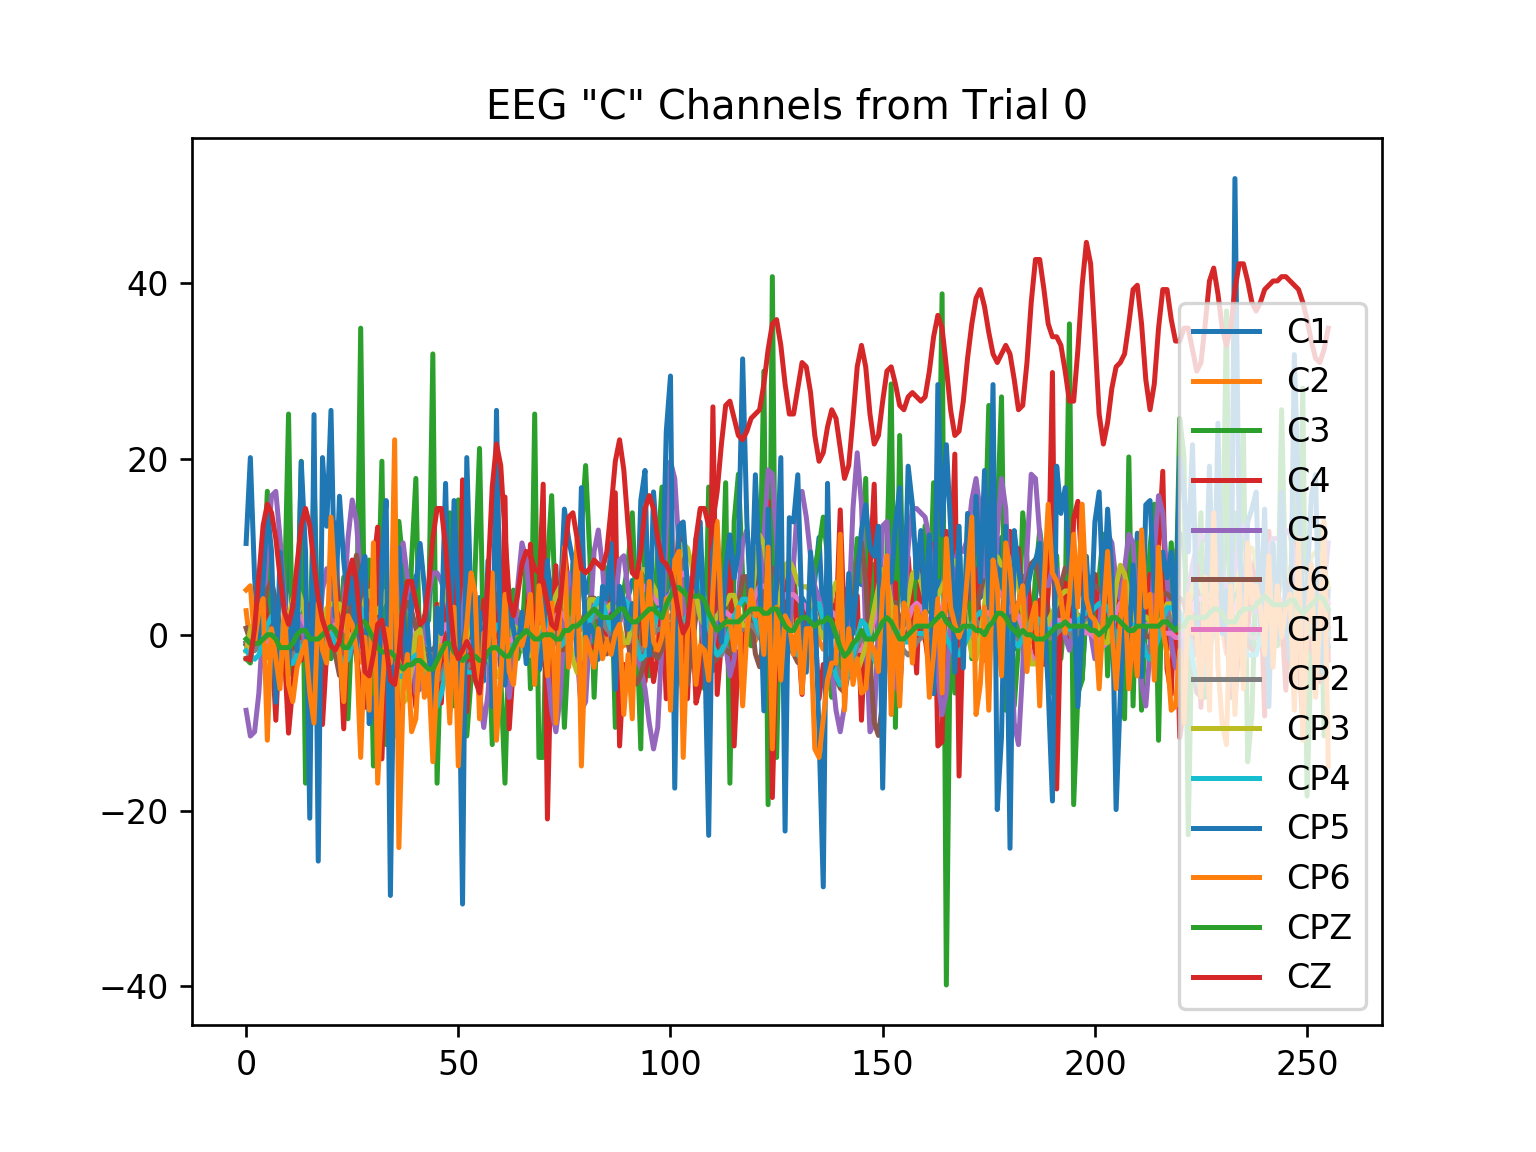

Text(0.5, 1.0, 'EEG "C" Channels from Trial 0')

In [230]:
##################################################################################################################
#
# YouDo:
#  
#  This data format is quite awkard.  A much better way to display the data would be as a
#  table with columns being the channels (particular EEG sensor), the rows being the time
#  of measurement, and the values being the actual measurements.
#  
#  Building this kind of table from our starting data is called a "pivot", something which 
#  pandas can do for us
#  
#  1) use the pivot method to build a new data frame called dfp which has:
#      columns = channel name (FP1, for example)
#      rows = time (the "counter")
#      values = uV measurements
#
#   2) Make a publication quality visualization of time vs voltage of all channels
#        in this file with a name beginning with the 'C' -- C1, C2, ...
#######################################  BEGIN STUDENT CODE  #####################################################
# 1) 

dfp = df.pivot(index='Time', columns='Channel',values='uV')
dfp.head()

#2) 
%matplotlib notebook
plt.figure()

for channel in dfp.columns:
    if channel.startswith('C'):
        plt.plot(dfp[channel], label=channel)

plt.legend()
#plt.xlabel('Time sample')
#plt.ylabel('EEG Amplitude (uV)')
plt.title('EEG "C" Channels from Trial 0')
#######################################   END STUDENT CODE   #####################################################


## File ingest
This data set has 304 different EEG sensor recordings.  We'd like to scale the data across channels & trials for use in machine learning models later.

The following bit of code also uses os.walk but this time imports all of the files into a big dictionary with one key for each "trial" of the experiment.  The mechanism of import is very similar to what you did above.

In [168]:
dfs = dict()
tic = dt.datetime.now()
for root, dirs, files in os.walk(filesloc, topdown=False):
    for name in files:
        thispath = os.path.join(root, name)
        if '.rd.' in thispath and not thispath.endswith('.gz'):
            thispatient = thispath.split('.rd.')[1]
            df=pd.read_csv(thispath  ,sep=' ',skiprows=4, comment='#',header=None)
            df.columns=['Trial','Channel','Time','uV']
            dfs[int(thispatient)] = df.pivot(index='Time', columns='Channel',values='uV')
            
toc = dt.datetime.now()
print('{} seconds to read to dfs'.format(toc-tic))

0:00:08.442145 seconds to read to dfs


In [190]:
# You can access a particular trial like this:
dfs[3].head()

Channel,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
Time,,,,,,,,,,,,,,,,,,,,,
0,2.553,3.133,3.672,2.330,3.398,-1.099,-0.732,-1.088,-1.007,-0.193,...,0.763,-5.524,-3.906,-0.315,-4.415,-1.343,-4.486,2.889,1.251,5.544
1,3.530,3.133,4.161,3.306,4.374,-4.028,-4.150,-1.088,-0.519,0.295,...,-3.143,-5.524,-2.930,0.661,-1.485,-1.343,-3.510,5.330,3.693,5.544
2,3.530,3.133,4.161,4.283,3.886,-0.610,-3.174,-1.577,-0.031,0.295,...,0.763,-3.571,-1.953,1.149,3.886,-0.854,-1.556,6.795,6.134,4.567
3,2.553,2.645,3.672,3.794,2.909,0.854,-0.244,-2.553,-1.007,-0.682,...,7.599,-1.617,-0.977,1.638,7.304,0.122,-0.092,6.795,7.599,3.103
4,1.088,1.668,2.696,1.841,1.933,-0.122,-1.221,-3.042,-1.495,-1.170,...,6.134,-0.153,-0.488,1.638,7.304,1.099,1.373,5.330,7.599,1.638


346.12 -159.526
Channel
X    346.12
dtype: float64


<IPython.core.display.Javascript object>


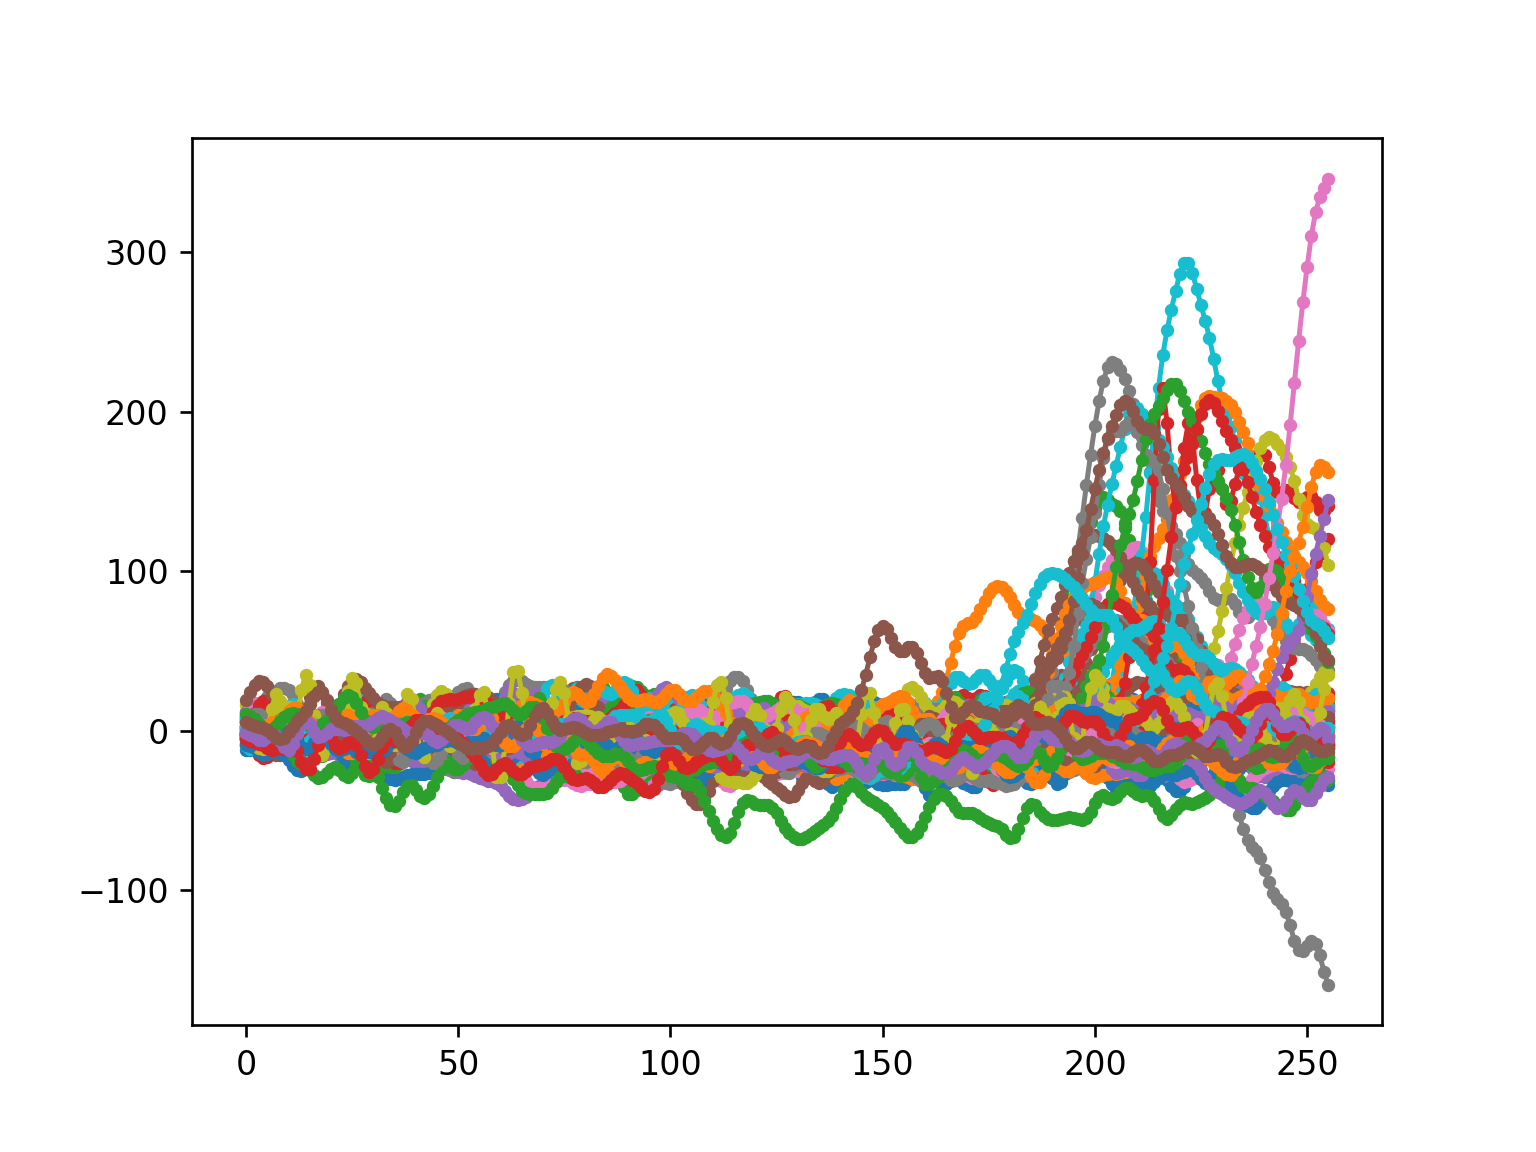

blah


In [296]:
##################################################################################################################
#
# YouDo:
#  
#  1) 
#   Loop through all the trials and find the global min & max values.
#   
#  2) Make a time vs. voltage visualization of the channel which contains the
#     highest peak from each trial.   I.e.  if the highest measure is in channel FP1,
#     make a plot showing FP1 from every trial.
#
# 
#  3) After re-reading the data documentation, propose an explanation for what you see 
#     in the plot.
#######################################  BEGIN STUDENT CODE  #####################################################

#1) 
globalmax = [dfs[d].max().max() for d in dfs.keys()]
globalmin = [dfs[d].min().min() for d in dfs.keys()]
print(max(globalmax), min(globalmin))

#2) 
kk =list(dfs.keys())
bigspike = kk[globalmax.index(max(globalmax))]

print(dfs[bigspike].max().loc[dfs[bigspike].max()==dfs[bigspike].max().max()])

plt.figure()
for d in dfs.keys():
    plt.plot(dfs[d].X,'.-')
    
    
#3) 

print('blah')

#######################################   END STUDENT CODE   #####################################################
